# Max features parameter

Investigate the relationship between max_features, n_features, and performance.

In [1]:
import os
from scipy.io import arff
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hildeweerts/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
n = 10 # retrieve only n settings per dataset per classifier with highest accuracy  
m = 40 # minimum number of observations per dataset to be included

# load data
data = arff.loadarff('data/meta_svm.arff')
svm = pd.DataFrame(data[0])
data = arff.loadarff('data/meta_random_forest.arff')
rf = pd.DataFrame(data[0])
data = arff.loadarff('data/meta_adaboost.arff')
ada = pd.DataFrame(data[0])

# load alg names and dataframes
g = svm.groupby('kernel')
algs = ['svm_' + s.decode('UTF-8') for s in list(g.groups.keys())] + ['rf', 'ada']
dfs_all = [g.get_group(x) for x in g.groups] + [rf, ada]

# retrieve top n for all dataframes
dfs = []
for df, alg in zip(dfs_all, algs):
    groups = []
    for g in df.groupby(['task_id']):
        group = pd.DataFrame(g[1])
        group['task_id'] = g[0]
        if len(group) > m:
            groups.append(group.sort_values(by = 'y', ascending  = False)[0:n])
        else: 
            print('Dataset %s not included for classifier %s because no. obervations is %s.' %(int(g[0]), alg, int(len(group))))
    dfs.append(pd.concat(groups))

for i, j in zip(dfs,algs):
    print('Classifier: %s, Nr. of observations: %s' %(j, len(i)))

Dataset 18 not included for classifier svm_poly because no. obervations is 27.
Dataset 3913 not included for classifier svm_poly because no. obervations is 30.
Dataset 3917 not included for classifier svm_poly because no. obervations is 36.
Dataset 14965 not included for classifier svm_poly because no. obervations is 9.
Dataset 14968 not included for classifier svm_poly because no. obervations is 32.
Dataset 3948 not included for classifier svm_rbf because no. obervations is 28.
Classifier: svm_poly, Nr. of observations: 950
Classifier: svm_rbf, Nr. of observations: 980
Classifier: svm_sigmoid, Nr. of observations: 990
Classifier: rf, Nr. of observations: 1000
Classifier: ada, Nr. of observations: 1000


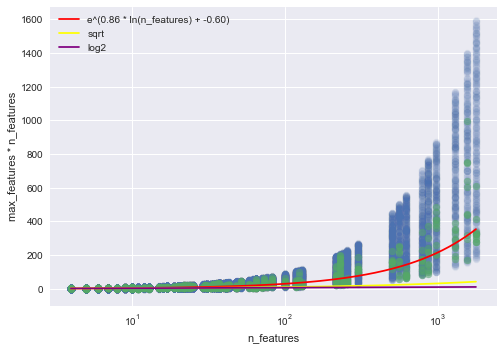

In [3]:
import numpy as np 

max_features = dfs[3]['max_features']*dfs[3]['NumberOfFeatures']
n_features = dfs[3]['NumberOfFeatures']
x = range(int(min(n_features)), int(max(n_features)))

plt.scatter(rf['NumberOfFeatures'], rf['max_features']*rf['NumberOfFeatures'], alpha = 0.05)
fit = np.polyfit(np.log(n_features), np.log(max_features), deg=1)
plt.scatter(n_features, max_features, alpha = 0.5)
plt.plot(x, np.exp(fit[0] * np.log(x) + fit[1]), color='red', label='e^(%.2f * ln(n_features) + %.2f)'%(fit[0], fit[1]))
plt.plot(x,np.sqrt(x), label='sqrt', c = 'yellow')
plt.plot(x,np.log2(x), label ='log2', c = 'purple')

plt.xlabel('n_features')
plt.ylabel('max_features * n_features')

#plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

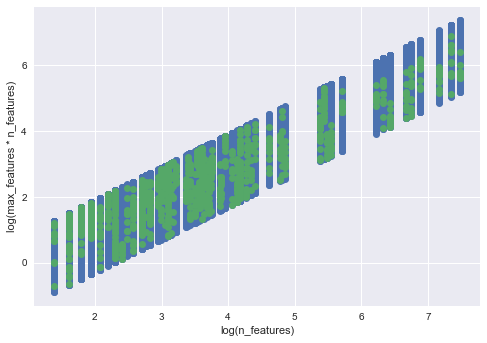

In [4]:
max_features = np.log(dfs[3]['max_features']*dfs[3]['NumberOfFeatures'])
n_features = np.log(dfs[3]['NumberOfFeatures'])
plt.plot(np.log(rf['NumberOfFeatures']), np.log(rf['max_features']*rf['NumberOfFeatures']), 'o')
plt.plot(n_features, max_features, 'o')
plt.xlabel('log(n_features)')
plt.ylabel('log(max_features * n_features)')
plt.show()


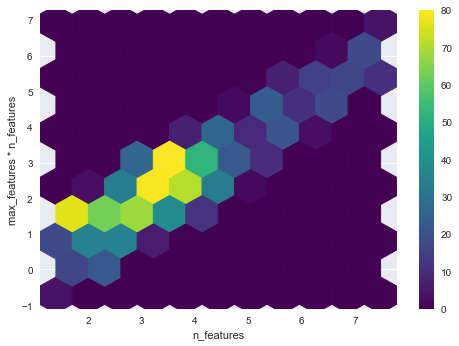

In [5]:
#plt.xscale('log')
#plt.yscale('log')
ax = plt.hexbin(n_features, max_features, cmap = 'viridis', gridsize = 10)
plt.xlabel('n_features')
plt.ylabel('max_features * n_features')

plt.colorbar(ax)
plt.show()

## Max_features histogram: max_features = n^x

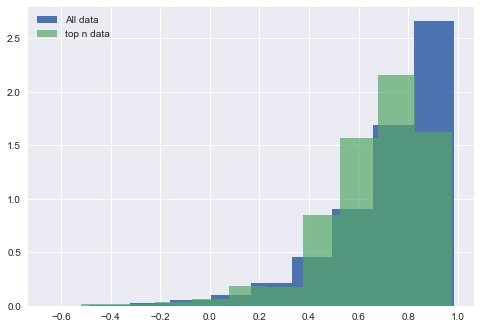

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
max_features = dfs[3]['max_features'] * dfs[3]['NumberOfFeatures']
n_features = dfs[3]['NumberOfFeatures']
x = np.log(max_features).divide(np.log(n_features))
x_all = np.log(rf['max_features']*rf['NumberOfFeatures']).divide(np.log(rf['NumberOfFeatures']))
plt.hist(x_all, density = True, label = 'All data')
plt.hist(x = x, density = True, label = 'top n data', alpha = 0.7)
plt.legend()
plt.show()